In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [4]:
data = pd.read_csv('dog_rates_tweets.csv')

In [5]:
rating_pattern = '(\d+(\.\d+)?)/10'
data['rating'] = data['text'].str.extract(rating_pattern, expand=True)[0]

In [6]:
data = data.dropna(subset=['rating'])

In [10]:
data['rating'] = data['rating'].astype(float)
data = data[data['rating'] <= 25]

In [8]:
data = data.loc[:, ['created_at', 'rating']].copy()
data['created_at'] = pd.to_datetime(data['created_at'])

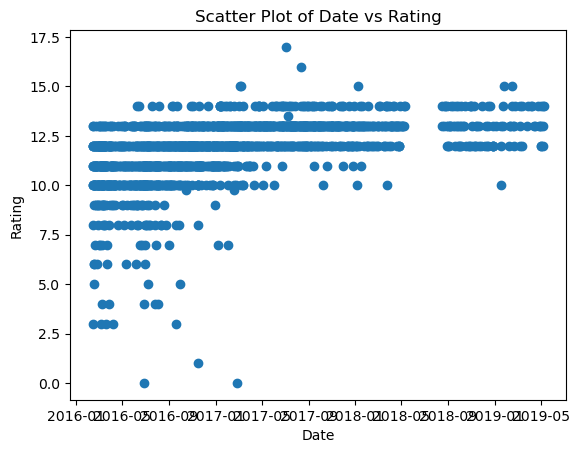

In [23]:
plt.scatter(data['created_at'], data['rating'])
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Scatter Plot of Date vs Rating')
plt.show()

In [26]:
def to_timestamp(dt):
    return dt.timestamp()

In [27]:
data['timestamp'] = data['created_at'].apply(to_timestamp)


In [28]:
slope, intercept, r_value, p_value, std_err = linregress(data['timestamp'], data['rating'])

In [29]:
fit_line = slope * data['timestamp'] + intercept


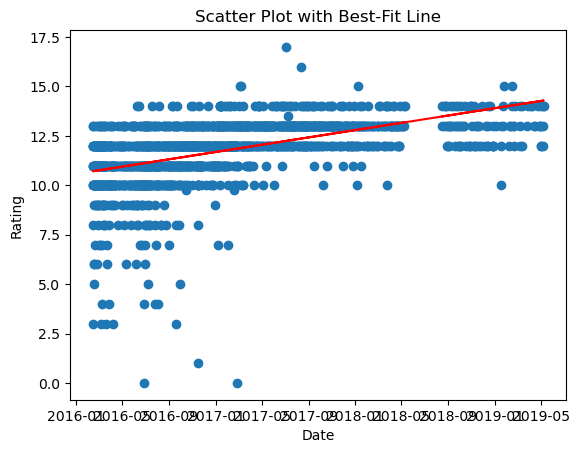

Data:
              created_at  rating
2    2018-05-09 23:48:56    14.0
7    2018-05-08 16:23:07    13.0
8    2018-05-07 23:11:58    14.0
24   2018-05-04 00:25:48    13.0
30   2018-05-02 18:19:39    13.0
...                  ...     ...
7363 2018-08-23 20:25:53    14.0
7369 2018-08-22 16:55:26    14.0
7381 2018-08-21 00:16:09    13.0
7431 2018-08-15 16:30:55    14.0
7433 2018-08-15 02:10:45    13.0

[1669 rows x 2 columns]

Slope: 3.5159299748477226e-08
Intercept: -40.46415480898918


In [30]:
plt.scatter(data['created_at'], data['rating'])
plt.plot(data['created_at'], fit_line, color='r')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Scatter Plot with Best-Fit Line')
plt.show()

print("Data:")
print(data[['created_at', 'rating']])
print()
print("Slope:", slope)
print("Intercept:", intercept)